In [5]:
import numpy as np
a = [[1,2],[3,4],[5,6]]
a = np.array(a)
print(a)
aa = a.ravel()
print(aa.ravel())
print(a.shape[0])
print(aa.shape)
aaa = [[0,1,3,4]]
aaa = np.array(aaa)
print(aaa.shape)

[[1 2]
 [3 4]
 [5 6]]
[1 2 3 4 5 6]
3
(6,)
(1, 4)


In [6]:
q = [0,1,2]
w = [[3,4],[5,6],[7,8]]

for Q,W in zip(q,w):
    print(Q,W)
    
qq = [0,1,2]
ww = [3,4,5]
for Q,W in zip(qq,ww):
    print(Q,W)

0 [3, 4]
1 [5, 6]
2 [7, 8]
0 3
1 4
2 5


In [7]:
import numpy as np
rgen = np.random.RandomState(1)
r = rgen.permutation(5)
print(r)
A = [2,3,4,1,4]
A = np.array(A)
print(A)
print(A[r])
e = [1,2,3,4,5,6,6,6]
e = np.array(e)
d = [0,2,3,4,5,6,7,1]
d = np.array(d)
print(e[d])
print(e[[d]]) 

rrr = np.random.permutation(5)
rrr

[2 1 4 0 3]
[2 3 4 1 4]
[4 3 4 2 1]
[1 3 4 5 6 6 6 2]
[1 3 4 5 6 6 6 2]


array([1, 0, 4, 3, 2])

In [38]:
import numpy as np
from numpy.random import seed

class AdalineSGD(object):
    
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
                
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
                
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        if not self.w_initialized:
            self._initialized_weights(X.shape[1])
            
        if y.ravel().shape[0] > 1:
            for xi, y in zip(X, y):
                self._update_weights(xi, target)
                
        else:
            self._update_weights(X, y)
        
        return self
    
    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1+m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta*xi.dot(error)
        self.w_[0] += self.eta*error
        
        cost = 0.5*error**2
        return cost
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X))>=0.0, 1,-1)

In [39]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/''machine-learning-databases/iris/iris.data',header=None)
df

import matplotlib.pyplot as plt
import numpy as np
y = df.iloc[0:100,4].values
y = np.where(y=="Iris-setosa", -1, 1)
X = df.iloc[0:100,[0,2]].values

X_std = X.copy()
X_std[:,0] = (X[:,0] - X[:,0].mean())/X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean())/X[:,1].std()

In [40]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    data_xx =  np.array([xx1.ravel(), xx2.ravel()]).T
    Z = classifier.predict(data_xx)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(X[y==cl,0], X[y==cl,1], 
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label=cl,
                   edgecolor="black")

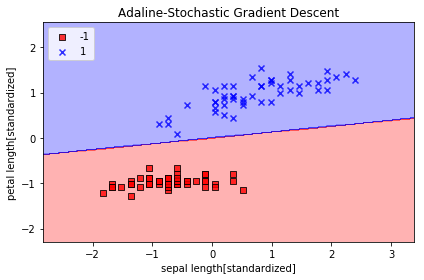

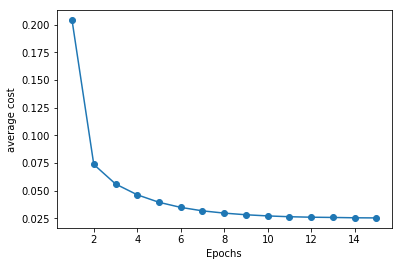

In [46]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title("Adaline-Stochastic Gradient Descent")
plt.xlabel("sepal length[standardized]")
plt.ylabel("petal length[standardized]")
plt.legend(loc="upper left")
plt.tight_layout()

plt.show()
plt.plot(range(1, ada.n_iter+1), ada.cost_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("average cost")
plt.show()